In [2]:
import requests
import pandas as pd

# define the function to fetch and process data
headers = {
"User-Agent": "Fbzi11a/5.ø",
"Accept": "application/json",
"Referer": "https://www.nseindia.com"
}
#url = "https://nseindia.com/api/option-chain-indices?symbol=BANKNIFTY"
url2 = "https://www.nseindia.com/api/option-chain-indices?symbol=NIFTY"

session = requests.Session()
session.get("https://www.nseindia.com", headers=headers)

response = session.get(url2, headers=headers)


CE Data:
 strikePrice  openInterest  changeinOpenInterest  totalTradedVolume  lastPrice  impliedVolatility
       16000      1.666667              0.000000                  0    7785.00               0.00
       17000   2648.333333              2.000000                  2    7400.00               0.00
       18000   1275.333333             -3.000000                  3    6489.95               0.00
       18000    136.000000              0.000000                  0    6800.00               0.00
       19000   2541.000000             18.000000                 22    5508.05               0.00
       19000     92.666667              0.000000                  0    5932.85               0.00
       20000   6316.000000             44.000000                156    4498.35               0.00
       20000      4.000000              0.000000                  0    3501.35               0.00
       20000    874.000000              1.000000                  9    5156.75               0.00
       203

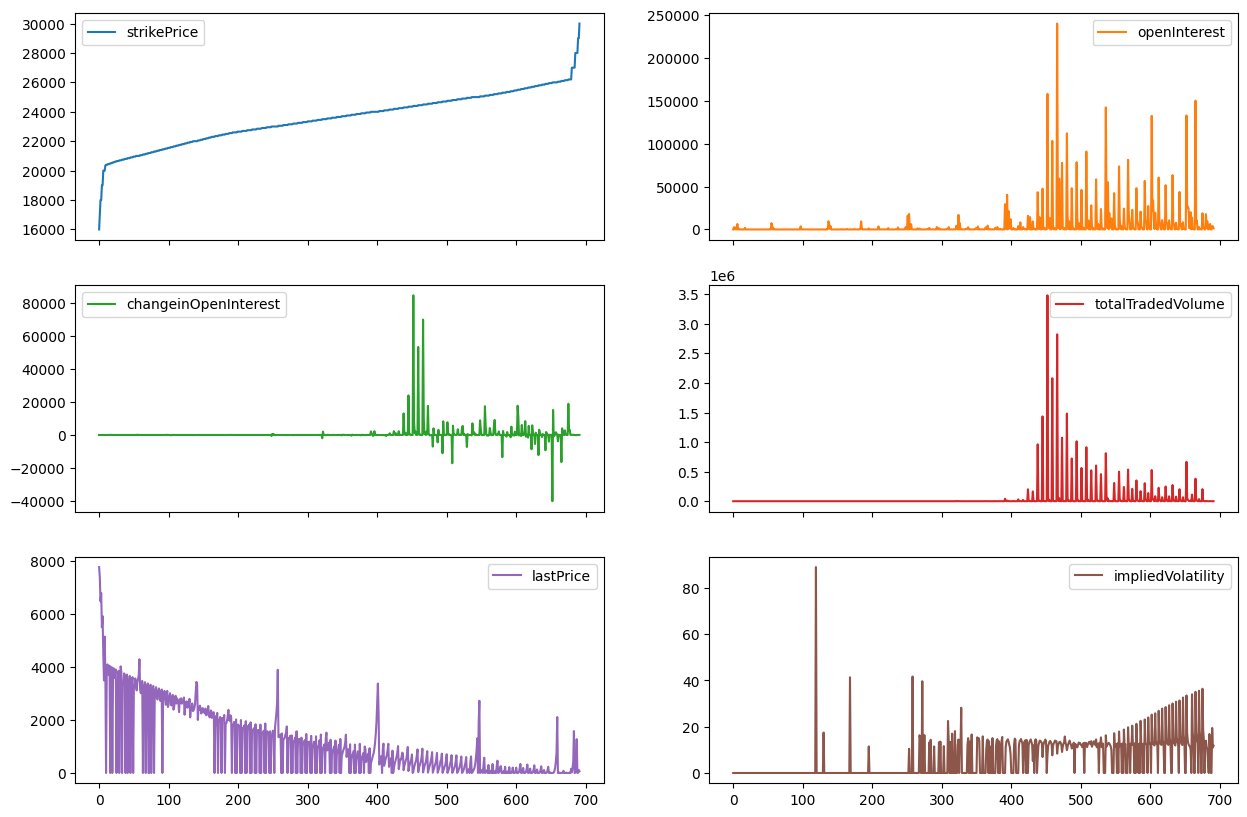

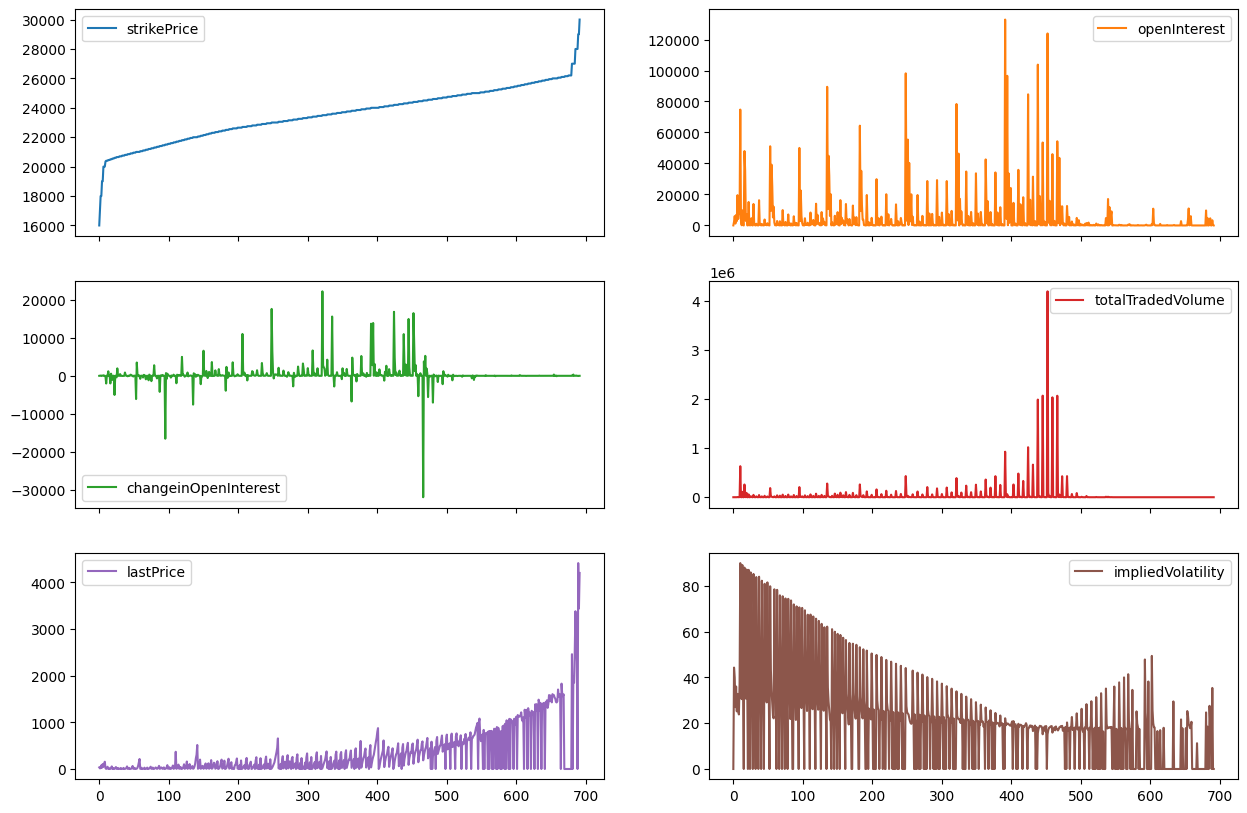

In [5]:
from matplotlib import pyplot as plt


data = response.json()
records = data['records']['data']


# extract CE and PE data for each strike price
ce_data = []
pe_data = []

for record in records:
    if 'CE' in record and 'PE' in record:
        ce_data.append(record['CE'])
        pe_data.append(record['PE'])


#convert to DataFrame

ce_df = pd.DataFrame(ce_data)
pe_df = pd.DataFrame(pe_data)

#print(ce_df[['strikePrice', 'openInterest', 'changeinOpenInterest', 'totalTradedVolume', 'lastPrice', 'impliedVolatility']]).head()

#pretty print the DataFrame
print("\nCE Data:")
print(ce_df[['strikePrice', 'openInterest', 'changeinOpenInterest', 'totalTradedVolume', 'lastPrice', 'impliedVolatility']].to_string(index=False))
print("\nPE Data:")
print(pe_df[['strikePrice', 'openInterest', 'changeinOpenInterest', 'totalTradedVolume', 'lastPrice', 'impliedVolatility']].to_string(index=False))
#plot the data
ce_df[['strikePrice', 'openInterest', 'changeinOpenInterest', 'totalTradedVolume', 'lastPrice', 'impliedVolatility']].plot(kind='line', subplots=True, layout=(3,2), figsize=(15,10))
plt.show()
#plot the data
pe_df[['strikePrice', 'openInterest', 'changeinOpenInterest', 'totalTradedVolume', 'lastPrice', 'impliedVolatility']].plot(kind='line', subplots=True, layout=(3,2), figsize=(15,10))
plt.show()
